# 다항 회귀 - 선형 회귀

독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것을 다항(Polynomial) 회귀라고 한다. 즉, 다항 회귀는 y = w0 + w1 * x1 + w2 * x2 + w3 * x1 * x2 + w4 * x1^2 + w5 * x2 ^ 2 과 같이 표현할 수 있다.

회귀에서 선형 회귀/비선형 회귀를 결정하는 것은 회귀 계수가 선형/비선형인지에 따른 것이지 독립변수의 선형/비선형 여부와는 무관.

y = w0 + w1 * x1 + w2 * x2 + w3 * x1 * x2 + w4 * x1^2 + w5 * x2 ^ 2 는 새로운 변수인 Z를 z = [x1, x2, x1*x2, x1^2, x2^2]로 한다면 y = w0 + w1 * z1 + w2 * z2 + w3 * z3 + w4 * z4 + w5 * z5와 같이 표현할 수 있기에 선형 회귀이다.

사이킷런은 PolynomialFeatures 클래스를 통해 피처를 Polynomial(다항식) 피처로 변환. PolynomialFeatures 클래스는 degree 파라미터를 통해 입력 받은 단항식 피처를 degree에 해당하는 다항식 피처로 변환한다.



In [1]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0, 1], [2, 3]]의 2 X 2 행렬 생성
X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 피처 :\n', X)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 단항식 계수 피처 :\n', poly_ftr)

일차 단항식 계수 피처 :
 [[0 1]
 [2 3]]
변환된 2차 단항식 계수 피처 :
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


단항 계수 피처 [x1, x2]를 2차 단항 계수 [1, x1, x2, x1^2, x1*x2, x2^2]로 변경하므로 첫 번째 입력 단항 계수 피처 [x1 = 0, x2 = 1]은 [1, 0, 1, 0, 0, 1]로 변경되고, [x1=2, x2=3]은 [1, 2, 3, 4, 6, 9]가 된다.



In [2]:
# 3차 다항 회귀 함수 변환
def polynomial_func(X):
    y = 1 + 2 * X[:, 0] + 3 * X[:, 0]**2 + 4 * X[:, 1]**3
    return y

X = np.arange(4).reshape(2, 2)
print('1차 단항식 계수 feature :\n', X)
y = polynomial_func(X)
print('3차 다항식 계수 결정값 :\n', y)

1차 단항식 계수 feature :
 [[0 1]
 [2 3]]
3차 다항식 계수 결정값 :
 [  5 125]


In [3]:
from sklearn.linear_model import LinearRegression

# 단항 계수 피처 [x1, x2] => 3차 다항 계수 [1, x1, x2, x1^2, x1*x2, x2^2, x1^3, x1^2*x2, x1*x2^2, x1^3] 로 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature :\n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수 \n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature :
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2 * X[:, 0] + 3 * X[:, 0]**2 + 4 * X[:, 1]**3
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature 변환과 Linear Regression 을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)), 
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2, 2)
y = polynomial_func(X)
model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


# 다항 회귀를 이용한 과소적합 및 과적합 이해

다항 회귀는 피처의 직선적 관계가 아닌 복잡한 다항 관계를 모델링할 수 있다. 다항식의 차수가 높아질수록 복잡한 피처 간의 관계까지 모델링이 가능하다. 하지만 **다항 회귀의 차수를 높일수록 학습 데이터에만 맞춰진 학습이 이루어져 과적합의 문제가 발생**

다항 회귀를 이용해 과소적합과 과적합의 문제를 잘 보여주는 예제 : https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py

### 소드 코드 설명
* 피처 X와 target y가 잡음(noise)이 포함된 다항식의 코사인 그래프 관계를 가지도록 만듦
* 이에 기반해 다항 회귀의 차수를 변화시키면서 그에 따른 회귀 예측 곡선과 예측 정확도를 비교
* 학습 데이터는 30개의 임의의 데이터인 X, X의 코사인 값에서 약간의 잡음 변동 값을 더한 target인 y로 구성

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동값을 더한 값
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.04320874987232058 입니다.

Degree 15 회귀 계수는 [-2.98291000e+03  1.03898770e+05 -1.87415056e+06  2.03715126e+07
 -1.44872551e+08  7.09311979e+08 -2.47064676e+09  6.24558367e+09
 -1.15676035e+10  1.56894317e+10 -1.54005437e+10  1.06456871e+10
 -4.91375763e+09  1.35919168e+09 -1.70380199e+08] 입니다.
Degree 15 MSE 는 180526263.29386473 입니다.



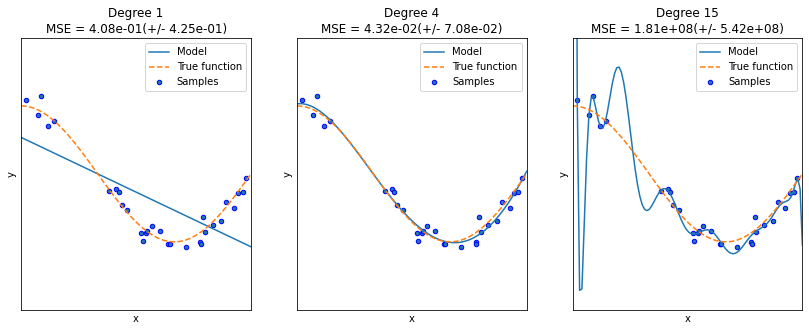

In [6]:
# 예측 결과를 비교할 다항식 차수를 각각 1, 4, 15로 변경하며 예측 결과 비교
# 1. 다항식 차수별로 학습 후 cross_cal_score()로 MSE값을 구해 차수별 예측 성능 평가
# 2. 0부터 1까지 균일하게 구성된 100개의 테스트용 데이터 세트로 차수별 회귀 예측 곡선 그리기
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 계수의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)

    # 교차 검증으로 다항 회귀 평가
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE 는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))

    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려 비교
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolors='b', s=20, label='Samples')

    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
print()
plt.show()

* 실선 : 다항 회귀 예측 곡선
* 점선 : 실제 데이터 세트 X, Y의 코사인 곡선
* 학습 데이터 : 0부터 1까지의 30개의 임의의 X 값과 그에 따른 코사인 Y 값에 잡음을 변동값으로 추가해 구성
* MSE 평가 : 학습 데이터를 10개의 교차 검증 세트로 나누어 측정해서 평균한 것

### 결과 해석
* Degree 1
    * 단순 직선 - 단순 선형 회귀
    * 실제 데이터 세트인 코사인 데이터 세트를 직선으로 예측하기에는 너무 단순
    * 예측 곡선이 학습 데이터의 패턴을 제대로 반영 X, 과소적합

* Degree 4
    * 실제 데이터 세트와 유사한 곡선 형태
    * 변동하는 잡음까지는 예측하지 못하지만, 학습 데이터 세트를 비교적 잘 반영해 코사인 곡선 기반으로 테스트 데이터를 잘 예측한 곡선을 가진 모델
    * MSE 값 약 0.043으로 가장 뛰어난 예측 성능을 가지고 있다.

* Degree 15
    * MSE가 180526263가 될 정도로 매우 큰 오류 값이 발생.
    * 데이트 세트의 변동 잡음 값까지 지나치게 반영한 결과, 예측 곡선이 학습 데이터 세트만 정확히 예측하고, 테스트 값의 실제 곡선과는 완전히 곡선 형태를 가진다.
    * 학습 데이터 세트에만 맞춘 심한 과적합의 모델

* 결론
    * 좋은 예측 모델은 학습 데이터 패턴을 잘 반영하면서도 복잡하지 않은 균형잡힌(Balanced) 모델을 의미.

# 편향-분산 트레이드오프(Bias-Variance Trade off)

편향-분산 트레이드오프는 머신러닝이 극복해야할 가장 중요한 이슈 중의 하나이다.

* 고편향(High Bias)성
    * Degree 1 모델처럼 매우 단순화된 모델로, 지나치게 한 방향성으로 치우친 경향

* 고분산(High Variance)성
    * Degree 15 모델처럼 학습 데이터 하나하나의 특성을 반영하면서 매우 복잡하고 지나치게 높은 변동성을 가짐

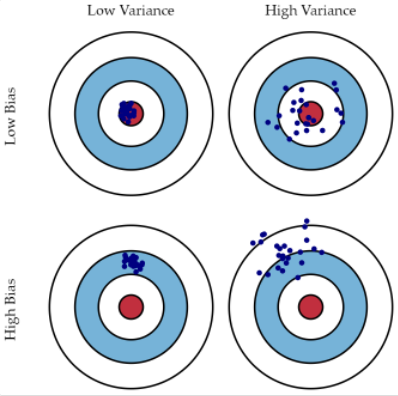

* 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향이 있다.
    * 편향이 높으면 분산은 낮아지고(과소적합) 반대로 분산이 높으면 편향이 낮아진다(과적합).

* 저편향 / 저분산 : 실제 결과에 근접 + 예측 변동이 크지 않음
* 저편향 / 고분산 : 실제 결과에 근접 + 예측 변동이 큼
* 고편향 / 저분산 : 실제 결과에서 벗어남 + 예측 변동이 크지 않음
* 고편향 / 고분산 : 실제 결과에서 벗어남 + 예측 변동이 큼

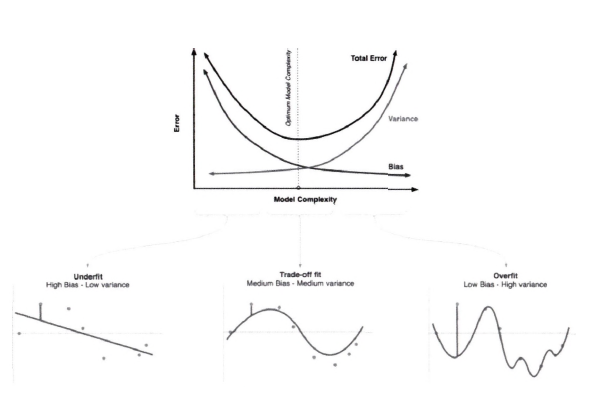

* 편향이 높으면 전체 오류가 높음
* 편향을 점점 낮추면 동시에 분산이 높아지고 전체 오류도 낮아짐
* 편향을 낮추고 분산을 높이면서 전체 오류가 낮아지는 '골디락스' 지점을 통과하면서 분산을 지속적으로 높이면 전체 오류 값이 오히려 증가하면서 예측 성능이 다시 저하

높은 편향/낮은 분산에서 과소적합되기 쉬우며, 낮은 편향/높은 분산에서 과적합되기 쉽다. 편향과 분산이 서로 트레이드오프를 이루며 오류 Cost 값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 방법이다.